# Restructuring introduction

## Starting model

In [1]:
from compute import Var
from datastructures.api import Model, adda

In [2]:
model = Model()
m = model.root
Pbus = Var('P_{bus}')
A = Var('A', 0.5)
Pcomms = adda(m, 'P_{comms}', 483.3*A-Pbus)
adda(m, Pbus, 10*abs(Pcomms)**0.5)
h = Var('h', 400e3)
D = Var('D', 0.1)
R = adda(m, 'R', Pcomms*D**2/h**2*1e18/(8e6))
C = adda(m, 'C', 2.5*D**2+12*(A+1)+0.1*Pbus)

We restructure with extended tearing

## Restructuring interface

In [3]:
from datastructures.graphutils import all_variables, all_edges
from datastructures.tearing import dir_graph, min_arc_set_assign
from datastructures.operators import reformulate

In [8]:
edges, tree = model.generate_formulation()
not_output = ['h', 'D', 'R'] # This forces the solution from the thesis to come out
eqnidxs = list(edges[1].keys())
varidxs = all_variables(*edges)
graph_edges_minassign = all_edges(*edges)
edges_left_right = list(dir_graph(graph_edges_minassign, eqnidxs, {}))
xsol,_ = min_arc_set_assign(edges_left_right, varidxs, eqnidxs, not_output=not_output)

In [9]:
outset_initial = {comp: var[0] for comp,var in edges[1].items()}
outset_opt = {right:left for left, right in edges_left_right 
                  if (left,right) in edges_left_right and xsol[left, right] > 0.5}

In [10]:
edges_minassign, tree_minassign = reformulate(edges, tree, outset_initial, 
                                              outset_opt, solveforvars=False)

## Visualize HSM

In [12]:
from datastructures.rendering import render_incidence

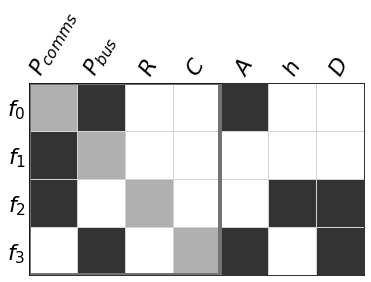

In [14]:
render_incidence(edges, tree, hideticks=True, rawvarname=True, patchwidth=4, fontsize=22);

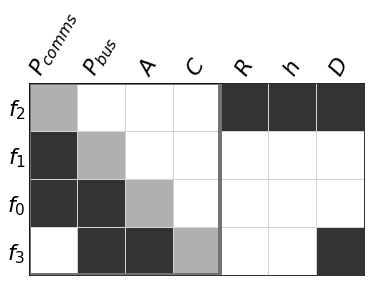

In [13]:
render_incidence(edges_minassign, tree_minassign, hideticks=True, rawvarname=True, patchwidth=4, fontsize=22);